In [1]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

In [2]:
url = "https://www.skysports.com/football/news"

ua = UserAgent()
user_agent = ua.random
headers = {"user-agent": user_agent}

ss = requests.session()
res = ss.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

In [3]:
soup.select('div[class="news-list__item news-list__item--show-thumb-bp30"] a[class="news-list__figure"]')[0]["href"]

'https://www.skysports.com/football/news/11679/12390748/cristiano-ronaldo-man-city-interested-in-signing-juventus-forward'

In [4]:
all_article = []
for i in soup.select('div[class="news-list__item news-list__item--show-thumb-bp30"] a[class="news-list__figure"]'):
    article_url = i["href"]
    
    res_article = ss.get(article_url, headers=headers)
    soup_article = BeautifulSoup(res_article.text, "html.parser")
    article = []
    
    for i in soup_article.select('div[class="sdc-article-body sdc-article-body--lead"] p'):
        article.append(i.text)
    article = " ".join(article)
    all_article.append(article)
    
all_article = " ".join(all_article)
all_article

'Manchester City are interested in signing Cristiano Ronaldo from Juventus, according to Sky in Italy. City are willing to offer Ronaldo a two-year contract, with a salary of £12.8m-per-season (€15m), and would like to sign the Portugal captain for free. But Juventus want at least £21.4m (€25m) as a transfer fee and no formal offer has been made yet. The 36-year-old, who scored 118 goals in 292 games for Manchester United between 2003 and 2009, has been linked with a move away from the Allianz Stadium this summer and is understood to be open to leaving, but Juventus expect him to stay. Ronaldo has not directly communicated to the club that he wants to depart. His current contract at the Allianz Stadium runs until June 2022 and he is earning €31m per year after tax. City are the only club currently interested in signing Ronaldo, with Paris Saint-Germain not in the picture. Ronaldo\'s representatives are pushing for a move, while Juventus would like to sign Gabriel Jesus to be a part of 

In [5]:
import nltk

In [6]:
sentences = nltk.sent_tokenize(all_article)

for sentence in sentences:
    print(sentence)

Manchester City are interested in signing Cristiano Ronaldo from Juventus, according to Sky in Italy.
City are willing to offer Ronaldo a two-year contract, with a salary of £12.8m-per-season (€15m), and would like to sign the Portugal captain for free.
But Juventus want at least £21.4m (€25m) as a transfer fee and no formal offer has been made yet.
The 36-year-old, who scored 118 goals in 292 games for Manchester United between 2003 and 2009, has been linked with a move away from the Allianz Stadium this summer and is understood to be open to leaving, but Juventus expect him to stay.
Ronaldo has not directly communicated to the club that he wants to depart.
His current contract at the Allianz Stadium runs until June 2022 and he is earning €31m per year after tax.
City are the only club currently interested in signing Ronaldo, with Paris Saint-Germain not in the picture.
Ronaldo's representatives are pushing for a move, while Juventus would like to sign Gabriel Jesus to be a part of th

In [7]:
tokens = [nltk.tokenize.word_tokenize(sentence) for sentence in sentences]
for token in tokens:
    print(token)

['Manchester', 'City', 'are', 'interested', 'in', 'signing', 'Cristiano', 'Ronaldo', 'from', 'Juventus', ',', 'according', 'to', 'Sky', 'in', 'Italy', '.']
['City', 'are', 'willing', 'to', 'offer', 'Ronaldo', 'a', 'two-year', 'contract', ',', 'with', 'a', 'salary', 'of', '£12.8m-per-season', '(', '€15m', ')', ',', 'and', 'would', 'like', 'to', 'sign', 'the', 'Portugal', 'captain', 'for', 'free', '.']
['But', 'Juventus', 'want', 'at', 'least', '£21.4m', '(', '€25m', ')', 'as', 'a', 'transfer', 'fee', 'and', 'no', 'formal', 'offer', 'has', 'been', 'made', 'yet', '.']
['The', '36-year-old', ',', 'who', 'scored', '118', 'goals', 'in', '292', 'games', 'for', 'Manchester', 'United', 'between', '2003', 'and', '2009', ',', 'has', 'been', 'linked', 'with', 'a', 'move', 'away', 'from', 'the', 'Allianz', 'Stadium', 'this', 'summer', 'and', 'is', 'understood', 'to', 'be', 'open', 'to', 'leaving', ',', 'but', 'Juventus', 'expect', 'him', 'to', 'stay', '.']
['Ronaldo', 'has', 'not', 'directly', 'com

In [11]:
pos = [nltk.pos_tag(token) for token in tokens]
for i in pos:
    print(i)

[('Manchester', 'NNP'), ('City', 'NNP'), ('are', 'VBP'), ('interested', 'JJ'), ('in', 'IN'), ('signing', 'VBG'), ('Cristiano', 'NNP'), ('Ronaldo', 'NNP'), ('from', 'IN'), ('Juventus', 'NNP'), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('Sky', 'NNP'), ('in', 'IN'), ('Italy', 'NNP'), ('.', '.')]
[('City', 'NNP'), ('are', 'VBP'), ('willing', 'JJ'), ('to', 'TO'), ('offer', 'VB'), ('Ronaldo', 'NNP'), ('a', 'DT'), ('two-year', 'JJ'), ('contract', 'NN'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('salary', 'NN'), ('of', 'IN'), ('£12.8m-per-season', 'NNP'), ('(', '('), ('€15m', 'NNP'), (')', ')'), (',', ','), ('and', 'CC'), ('would', 'MD'), ('like', 'VB'), ('to', 'TO'), ('sign', 'VB'), ('the', 'DT'), ('Portugal', 'NNP'), ('captain', 'NN'), ('for', 'IN'), ('free', 'JJ'), ('.', '.')]
[('But', 'CC'), ('Juventus', 'NNP'), ('want', 'VBP'), ('at', 'IN'), ('least', 'JJS'), ('£21.4m', 'NN'), ('(', '('), ('€25m', 'JJ'), (')', ')'), ('as', 'IN'), ('a', 'DT'), ('transfer', 'NN'), ('fee', 'NN'), ('and

In [14]:
wordnet_pos = []
for p in pos:
    for word, tag in p:
        if tag.startswith("J"):
            wordnet_pos.append(nltk.corpus.wordnet.ADJ)
        elif tag.startswith("V"):
            wordnet_pos.append(nltk.corpus.wordnet.VERB)
        elif tag.startswith("N"):
            wordnet_pos.append(nltk.corpus.wordnet.NOUN)
        elif tag.startswith("R"):
            wordnet_pos.append(nltk.corpus.wordnet.ADV)
        else:
            wordnet_pos.append(nltk.corpus.wordnet.NOUN)

In [15]:
lemmmatizer = nltk.stem.wordnet.WordNetLemmatizer()
tokens = [lemmmatizer.lemmatize(p[n][0], pos=wordnet_pos[n]) for p in pos for n in range(len(p))]

for token in tokens:
    print(token)

Manchester
City
be
interested
in
sign
Cristiano
Ronaldo
from
Juventus
,
accord
to
Sky
in
Italy
.
City
are
will
to
offer
Ronaldo
a
two-year
contract
,
with
a
salary
of
£12.8m-per-season
(
€15m
)
,
and
would
like
to
sign
the
Portugal
captain
for
free
.
But
Juventus
want
at
least
£21.4m
(
€25m
)
a
a
transfer
fee
and
no
formal
offer
ha
be
made
yet
.
The
36-year-old
,
who
scored
118
goal
in
292
game
for
Manchester
United
between
2003
and
2009
,
have
been
linked
with
a
move
away
from
the
Allianz
Stadium
this
summer
and
is
understood
to
be
open
to
leave
,
but
Juventus
expect
him
to
stay
.
Ronaldo
ha
not
directly
communicated
to
the
club
that
he
want
to
depart
.
His
current
contract
at
the
Allianz
Stadium
run
until
June
2022
and
he
is
earning
€31m
per
year
after
tax
.
City
are
the
only
club
currently
interested
in
signing
Ronaldo
,
with
Paris
Saint-Germain
not
in
the
picture
.
Ronaldo
's
representatives
are
pushing
for
a
move
,
while
Juventus
would
like
to
sign
Gabriel
Jesus
to
be
a
part
of
th

have
a
stop
.
I
'm
go
to
have
to
take
a
break
,
see
what
we
've
done
.
Please
use
Chrome
browser
for
a
more
accessible
video
player
``
And
in
the
process
,
I
would
like
to
coach
a
South
American
(
team
)
,
European
,
playing
a
Copa
America
,
I
want
to
have
that
experience
.
''
Guardiola
took
a
12-month
break
follow
his
departure
from
Barcelona
in
2012
after
four
year
at
the
Nou
Camp
,
and
join
Bayern
Munich
in
2013
.
His
comment
come
on
the
day
City
's
pursuit
of
Harry
Kane
ended
,
with
the
England
captain
confirm
he
would
be
staying
at
Tottenham
this
summer
.
Arsenal
got
their
season
up
and
running
by
coasting
to
victory
in
their
second-round
Carabao
Cup
tie
at
West
Brom
-
with
Pierre-Emerick
Aubameyang
hitting
a
hat-trick
on
his
return
to
the
side
.
With
pressure
build
on
manager
Mikel
Arteta
already
after
two
defeat
at
the
start
of
the
new
Premier
League
campaign
,
there
wa
welcome
relief
a
the
Gunners
smashed
their
host
6-0
,
setting
up
a
third-round
tie
against
League
One
side
AFC

,
Erling
Haaland
might
be
leaving
Borussia
Dortmund
,
Manchester
United
might
need
a
striker
so
Daniel
Levy
might
think
he
could
get
the
£150m
next
year
.
It
's
a
brave
move
as
a
year
and
a
half
ago
club
were
putting
staff
on
furlough
.
Tottenham
are
now
turning
down
£130m
so
it
just
show
you
the
vast
amount
of
money
within
football
.
Tottenham
are
clearly
in
a
good
financial
position
if
they
're
turn
down
this
amount
of
money
.
The
fan
will
be
delighted
and
a
soon
a
Harry
score
his
next
goal
for
Tottenham
,
they
will
all
get
on
with
it
.
The
matter
for
now
will
be
put
to
bed
.
But
if
Harry
still
is
n't
happy
next
year
,
I
've
got
no
doubt
at
all
that
if
the
possibility
of
a
move
came
around
again
with
two
year
left
on
his
contract
,
it
might
be
a
different
conversation
.
Time
will
tell
.
Please
use
Chrome
browser
for
a
more
accessible
video
player
Sky
Sports
News
'
Kaveh
Solhekol
on
The
Transfer
Show
:
``
Cristiano
Ronaldo
is
available
at
the
moment
.
Juventus
would
like
to
sell
him
i

stage
.
But
in
term
of
the
immediate
priority
of
this
season
,
it
's
a
good
day
for
Tottenham
Hotspur
Football
Club
.
The
wording
of
Kane
's
tweet
is
interesting
.
'
...
this
summer…
'
have
led
to
speculation
Man
City
or
other
club
could
come
in
again
for
Kane
in
January
or
this
time
next
year
.
Nuno
ha
say
``
It
's
finished
''
.
Is
it
?
Gilmour
:
Nothing
has
changed
in
the
sense
that
Kane
want
to
go
for
the
major
title
.
He
want
to
be
in
team
that
are
challenging
for
league
and
the
cup
.
He
just
want
Tottenham
to
show
ambition
.
He
want
Tottenham
to
progress
and
be
of
a
level
that
he
want
to
be
at
.
The
Tottenham
players
got
a
real
taste
for
that
in
the
Champions
League
final
.
He
want
more
of
that
and
if
Tottenham
are
way
off
the
pace
,
then
that
's
the
drive
factor
for
him
wanting
away
for
the
last
year
or
so
.
What
good
might
come
of
this
from
a
Kane
perspective
is
,
we
've
seen
some
player
move
on
this
summer
,
we
've
seen
Paratici
come
in
with
a
new
manager
a
well
.
So
is
there
a

change
policy
on
arrivals
from
red
list
country
or
force
Premier
League
club
to
let
player
travel
for
World
Cup
qualifying
match
in
those
area
.
FIFA
president
Gianni
Infantino
ha
write
to
Prime
Minister
Boris
Johnson
to
request
exemption
for
player
due
to
play
in
red-list
countries
during
the
upcoming
international
break
.
But
the
Government
have
told
Sky
News
that
public
health
is
their
top
priority
and
concern
over
foreign
variants
mean
there
be
no
way
the
rule
can
be
relaxed
for
professional
footballer
.
Downing
Street
say
this
is
different
from
Euro
2020
-
when
all
the
player
were
contained
within
specific
bubble
and
there
be
le
travel
involved
.
The
Premier
League
announced
on
Tuesday
that
nearly
60
player
from
19
club
would
not
be
released
next
week
to
fly
off
to
World
Cup
qualifier
in
26
country
on
the
UK
Government
list
.
La
Liga
be
also
backing
their
club
'
decision
not
to
release
player
for
qualifier
in
country
where
the
players
would
have
to
quarantine
on
their
return
.
The

In [16]:
nltk_stopwords = nltk.corpus.stopwords.words("english")
tokens = [token for token in tokens if token not in nltk_stopwords]
for token in tokens:
    print(token)

Manchester
City
interested
sign
Cristiano
Ronaldo
Juventus
,
accord
Sky
Italy
.
City
offer
Ronaldo
two-year
contract
,
salary
£12.8m-per-season
(
€15m
)
,
would
like
sign
Portugal
captain
free
.
But
Juventus
want
least
£21.4m
(
€25m
)
transfer
fee
formal
offer
ha
made
yet
.
The
36-year-old
,
scored
118
goal
292
game
Manchester
United
2003
2009
,
linked
move
away
Allianz
Stadium
summer
understood
open
leave
,
Juventus
expect
stay
.
Ronaldo
ha
directly
communicated
club
want
depart
.
His
current
contract
Allianz
Stadium
run
June
2022
earning
€31m
per
year
tax
.
City
club
currently
interested
signing
Ronaldo
,
Paris
Saint-Germain
picture
.
Ronaldo
's
representatives
pushing
move
,
Juventus
would
like
sign
Gabriel
Jesus
part
deal
,
City
want
sell
Brazil
international
forward
.
Please
use
Chrome
browser
accessible
video
player
Ronaldo
surprise
omission
starting
line-up
Juve
's
Serie
A
opener
Udinese
left
training
Wednesday
arm
injury
.
You
follow
latest
transfer
news
rumour
dedicated
Transf

saw
evade
number
challenge
low
shot
wa
pushed
foot
Aubameyang
,
tucked
home
close-range
Arsenal
's
first
goal
campaign
.
Odegaard
marked
second
debut
goal
hit
post
tight
angle
goal
gap
.
The
tie
wrapped
Arsenal
scored
two
quick
succession
stroke
half-time
.
First
,
Aubameyang
doubled
tally
night
tap
home
Pepe
hit
post
follow
fine
Mohamed
Elneny
pas
.
Then
turn
provider
,
see
shot
saved
acrobatic
shot
fell
Pepe
slide
finish
.
Saka
got
name
scoresheet
soon
restart
,
finishing
aplomb
following
fine
flick
Odegaard
.
Lacazette
opened
account
season
four
minute
first
appearance
,
tucking
home
front
post
Pepe
claimed
another
assist
.
That
wa
end
rout
Arteta
enjoyed
fine
evening
round
ahead
Saturday
's
trip
reign
Premier
League
champions
Carabao
Cup
holder
Manchester
City
.
Please
use
Chrome
browser
accessible
video
player
Mikel
Arteta
Sky
Sports
Football
:
``
It
's
always
tough
place
come
midweek
.
They
made
changes
keep
clean
sheet
attitude
team
,
overall
I
'm
happy
.
We
're
really
disappoin

£130m
Tottenham
n't
want
engage
.
That
's
Daniel
Levy
's
prerogative
said
doe
n't
want
sell
.
He
doe
n't
want
leave
right
want
matter
closed
soon
possible
.
As
professional
,
Harry
's
point
view
,
's
going
get
.
With
club
like
Manchester
City
,
want
win
trophies
perhaps
looked
Tottenham
n't
shown
ambition
's
wanted
.
I
think
agreement
last
year
n't
win
trophy
Levy
would
sell
,
obviously
wa
n't
case
.
Daniel
n't
stick
deal
ha
decided
keep
prerogative
.
Once
sign
contract
're
legally
binding
,
's
lot
,
everyone
sign
contract
.
Please
use
Chrome
browser
accessible
video
player
I
'm
sure
Kylian
Mbappe
signed
contract
PSG
's
still
going
get
sold
.
If
want
go
,
'll
get
new
club
.
Harry
's
representatives
took
bit
stick
signing
long-term
contract
player
want
sign
long-term
contract
club
love
.
If
end
leaving
next
summer
,
I
'm
still
sure
'd
welcomed
back
Tottenham
legend
thing
happen
football
.
Where
Tottenham
extremely
fortunate
've
got
incredible
professional
want
break
record
'll
want
brea

Euro
2020
squad
member
miss
playmaker
recovers
foot
injury
,
goalkeeper
Dean
Henderson
building
fitness
contracting
Covid-19
last
month
.
Danny
Ings
begun
Aston
Villa
career
goal
scoring
form
-
including
spectacular
overhead
kick
win
Newcastle
.
And
Dele
Alli
?
Over
two
years
since
last
International
appearance
,
early
season
form
deeper
midfield
role
Tottenham
shown
promise
.
Please
use
Chrome
browser
accessible
video
player
Dean
Henderson
's
continuing
absence
mean
Sam
Johnstone
Aaron
Ramsdale
likely
Jordan
Pickford
's
goalkeeping
support
.
However
,
question
mark
Ben
White
Ben
Chilwell
.
White
currently
recovering
Covid-19
missing
Arsenal
's
defeat
Chelsea
significant
doubt
clash
Manchester
City
weekend
.
Ben
Chilwell
n't
play
minute
England
Euro
2020
-
wa
sidelined
deem
close
contact
following
Billy
Gilmour
's
positive
Covid-19
test
tournament
.
So
far
,
Chilwell
ha
n't
featured
Chelsea
season
-
Thomas
Tuchel
opting
Marcos
Alonso
.
England
’
three
World
Cup
Qualifiers
September
inv

summer
tell
come
look
rejuvenated
refreshed
since
day
Jose
Mourinho
,
n't
quite
click
Mourinho
.
You
've
get
new
signing
coming
thing
probably
feel
bit
optimistic
,
especially
try
move
player
n't
want
.
But
seem
like
're
starting
make
move
shape
squad
's
going
competitive
.
We
n't
know
squad
gel
new
signing
settle
.
But
early
stages
season
shown
plenty
promise
.
You
follow
latest
transfer
news
rumour
dedicated
Transfer
Centre
blog
Sky
Sports
'
digital
platforms
,
well
keeping
track
development
Sky
Sports
News
.
The
£250,000
grab
Super
6
,
always
completely
free
play
.
Entries
3pm
Saturday
.
Aberdeen
defender
Andrew
Considine
ruled
Christmas
knee
surgery
.
The
34-year-old
suffer
cruciate
ligament
injury
first
leg
Europa
Conference
League
play-off
Qarabag
Baku
last
week
operation
Wednesday
morning
.
Ahead
return
game
Pittodrie
Thursday
,
Aberdeen
1-0
,
manager
Stephen
Glass
say
:
``
Andy
went
see
specialist
yesterday
,
ha
today
cruciate
repaired
going
beyond
Christmas
.
``
It
something
a

specific
bubble
le
travel
involved
.
The
Premier
League
announced
Tuesday
nearly
60
player
19
club
would
released
next
week
fly
World
Cup
qualifier
26
country
UK
Government
list
.
La
Liga
also
backing
club
'
decision
release
player
qualifier
country
players
would
quarantine
return
.
The
Government
state
returning
England
country
red
list
must
quarantine
10
full
days
managed
quarantine
hotel
take
coronavirus
test
day
two
day
eight
quarantining
.
But
Infantino
say
Wednesday
statement
:
``
We
face
global
problem
together
past
must
continue
future
.
``
The
release
player
upcoming
international
window
matter
great
urgency
importance
.
''
Infantino
called
``
show
solidarity
every
member
association
,
every
league
every
club
,
right
fair
global
game
''
.
He
added
:
``
Many
best
player
world
compete
league
England
Spain
believe
country
also
share
responsibility
preserve
protect
sporting
integrity
competition
around
world
.
``
On
issue
quarantine
restriction
England
,
players
returning
red-list

left
contract
'
.
``
Real
getting
ready
next
summer
,
problem
Leonardo
Mbappe
given
word
PSG
'll
never
leave
club
free
.
''
Please
use
Chrome
browser
accessible
video
player
French
football
expert
Tom
Williams
:
``
I
think
huge
game-changer
.
In
light
Leonardo
said
French
medium
,
I
think
Mbappe
closer
joining
Real
Madrid
within
summer
transfer
window
staying
PSG
.
Leonardo
ha
say
Mbappe
want
leave
's
first
time
anyone
PSG
confirmed
.
``
He
's
said
PSG
n't
want
sell
's
stance
along
.
He
's
also
said
player
want
leave
,
club
wo
n't
stand
way
provide
valuation
met
.
He
's
basically
paving
way
Real
Madrid
come
back
another
bid
.
``
Assuming
bid
match
PSG
holding
,
I
think
could
see
Mbappe
standing
Bernabeu
pitch
Real
Madrid
shirt
within
next
week
.
''
The
£250,000
grab
Super
6
,
always
completely
free
play
.
Entries
3pm
Saturday
.


In [18]:
ne_chunked_sents = [nltk.ne_chunk(tag) for tag in pos]
ne_chunked_sents

[Tree('S', [('Manchester', 'NNP'), ('City', 'NNP'), ('are', 'VBP'), ('interested', 'JJ'), ('in', 'IN'), ('signing', 'VBG'), Tree('PERSON', [('Cristiano', 'NNP'), ('Ronaldo', 'NNP')]), ('from', 'IN'), Tree('GPE', [('Juventus', 'NNP')]), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('Sky', 'NNP'), ('in', 'IN'), Tree('GPE', [('Italy', 'NNP')]), ('.', '.')]),
 Tree('S', [('City', 'NNP'), ('are', 'VBP'), ('willing', 'JJ'), ('to', 'TO'), ('offer', 'VB'), Tree('PERSON', [('Ronaldo', 'NNP')]), ('a', 'DT'), ('two-year', 'JJ'), ('contract', 'NN'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('salary', 'NN'), ('of', 'IN'), ('£12.8m-per-season', 'NNP'), ('(', '('), ('€15m', 'NNP'), (')', ')'), (',', ','), ('and', 'CC'), ('would', 'MD'), ('like', 'VB'), ('to', 'TO'), ('sign', 'VB'), ('the', 'DT'), Tree('GPE', [('Portugal', 'NNP')]), ('captain', 'NN'), ('for', 'IN'), ('free', 'JJ'), ('.', '.')]),
 Tree('S', [('But', 'CC'), Tree('PERSON', [('Juventus', 'NNP')]), ('want', 'VBP'), ('at', 'IN'), ('least

In [30]:
name_entities = []

for ne_tagged_sentence in ne_chunked_sents:
    for tagged_tree in ne_tagged_sentence:
        if hasattr(tagged_tree, "label"):
            entity_name = " ".join(c[0] for c in tagged_tree.leaves())
            entity_type = tagged_tree.label()
            name_entities.append((entity_name, entity_type))
            name_entities = list(set(name_entities))

for ner in name_entities:
    print(ner)

('Balogun', 'ORGANIZATION')
('Chelsea', 'GPE')
('Billy Gilmour', 'PERSON')
('Mario Lemina', 'PERSON')
('Fulham', 'GPE')
('Reece James', 'PERSON')
('Atletico Madrid', 'PERSON')
('Jonny', 'PERSON')
('Broja', 'PERSON')
('Watch', 'GPE')
('FA', 'ORGANIZATION')
('Furuhashi', 'PERSON')
('Kurt Zouma', 'PERSON')
('Pierre-Emerick Aubameyang', 'PERSON')
('Glen Kamara', 'PERSON')
('Ryan Bertrand', 'PERSON')
('Lucas', 'PERSON')
('Sergio Aguero', 'PERSON')
('Paratici', 'ORGANIZATION')
('Rashford', 'GPE')
('Aubameyang', 'PERSON')
('Foden', 'ORGANIZATION')
('Exiles', 'GPE')
('Hoops', 'ORGANIZATION')
('Duje', 'PERSON')
('Wycombe', 'GPE')
('Gabriel Jesus', 'PERSON')
('Newcastle United', 'ORGANIZATION')
('Montpellier', 'ORGANIZATION')
('Rodon', 'ORGANIZATION')
('Brentford', 'ORGANIZATION')
('Tomorrow', 'GPE')
('Aubameyang', 'GPE')
('Australia', 'GPE')
('Brighton', 'GPE')
('Sead Kolasinac', 'PERSON')
('Leeds', 'PERSON')
('William Saliba', 'PERSON')
('Jamaica', 'PERSON')
('Kieran Trippier', 'PERSON')
('Phi

### Football news to WordCloud

In [31]:
entities_to_wc = []

for ne_tagged_sentence in ne_chunked_sents:
    for tagged_tree in ne_tagged_sentence:
        if hasattr(tagged_tree, "label"):
            entity_name = " ".join(c[0] for c in tagged_tree.leaves())
            entities_to_wc.append(entity_name)

In [32]:
with open(file='my_stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')

In [33]:
entities_to_wc = [e for e in entities_to_wc if e.upper() not in stop_words]

In [34]:
text = " ".join(entities_to_wc)

### Word Cloud

In [35]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

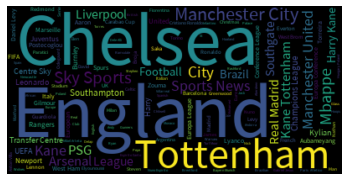

In [36]:
wordcloud = WordCloud(font_path='TaipeiSansTCBeta-Regular.ttf').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()